In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow import keras


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('PruebaTG_v2.xlsx')

In [ ]:

df = df.drop(0)
df = df.reset_index(drop= True)

In [ ]:
dups = df.pivot_table(index = ['Diagnosis'], aggfunc ='size') 
  
print(dups) 

Diagnosis
diabetes       668
healthy        441
intolerance    865
dtype: int64


In [ ]:
#sano 0, intolerate a la glucosa = 1, prediabetes 2, diabetes = 3

df['Diagnosis'] = df['Diagnosis'].replace({'healthy' : 0}, regex=True)

In [ ]:
df['Diagnosis'] = df['Diagnosis'].replace({'prediabetes' : 2}, regex=True)

In [ ]:
df['Diagnosis'] = df['Diagnosis'].replace({'intolerance' : 1}, regex=True)


In [ ]:
df['Diagnosis'] = df['Diagnosis'].replace({'diabetes' : 2}, regex=True)


In [ ]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df, test_size = 0.30, random_state = 100)

print("Examples used for training: ", len(train))
print("Examples used for test: ", len(test))

Examples used for training:  1381
Examples used for test:  593


In [ ]:
#patients = df.drop(["Paciente","Edad","Diagnostico","Basal"], axis=1)
patients = df.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_train = train.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_test = test.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
#patients = patients.drop(0)
p_train.head(5)



,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303
545,70.013398,70.099281,70.310719,70.683925,71.242275,71.998571,72.959478,74.124148,75.486303,77.039402,...,113.144839,112.855551,112.568042,112.282307,111.998337,111.716125,111.435664,111.156945,110.879959,110.604700
1286,99.326902,98.643168,98.049814,97.567919,97.213219,96.996921,96.926422,97.005887,97.236775,97.618391,...,132.713109,132.452772,132.194010,131.936818,131.681190,131.427120,131.174602,130.923631,130.674201,130.426308
438,69.569336,69.162807,68.856940,68.668936,68.607480,68.675065,68.869861,69.186851,69.619011,70.158178,...,91.607970,91.476853,91.346337,91.216420,91.087100,90.958376,90.830246,90.702707,90.575758,90.449397
1202,100.001976,100.014997,100.048060,100.108305,100.201347,100.331566,100.502297,100.716048,100.974581,101.279121,...,137.890610,137.620184,137.351102,137.083366,136.816978,136.551939,136.288252,136.025917,135.764937,135.505311
949,88.904965,87.942021,87.276298,86.898256,86.781386,86.895307,87.210217,87.700239,88.342159,89.116041,...,148.575320,148.236815,147.899187,147.562490,147.226851,146.892187,146.558443,146.225671,145.893947,145.563210


<hr>

In [ ]:
s = patients.shape
s[1]
x = [i for i in range(0,s[1],30)]
x


[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [ ]:
a = [patients.iloc[:,i] for i in range(0,s[1],30)]
x_test = [p_test.iloc[:,i] for i in range(0,s[1],30)]
x_train = [p_train.iloc[:,i] for i in range(0,s[1],30)]
a = np.array(a).T
x_train = np.array(x_train).T
x_test = np.array(x_test).T

x_test.shape


(593, 10)

In [ ]:
labels = df[['Diagnosis']]
labels_train = train[['Diagnosis']]
labels_test = test[['Diagnosis']]
#labels = labels.drop(0)
labels_train.head(20)

,Diagnosis
545,1
1286,2
438,0
1202,1
949,1
533,1
1293,1
64,1
202,2
480,2


<hr>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
#a = np.zeros((len(labels), 300))

In [ ]:
#for i in range(0, len(labels)):
  #a[i,:]= patients.loc[i,:].to_numpy().T

In [ ]:
y_train = labels_train.to_numpy()
y_test = labels_test.to_numpy()

In [ ]:
#y_train = keras.utils.to_categorical(y_train, 5)
#y_test = keras.utils.to_categorical(y_test, 5)

In [ ]:
y_train

array([[1],
       [2],
       [0],
       ...,
       [2],
       [0],
       [1]])

In [ ]:
a
l = labels.to_numpy()


In [ ]:
a.shape

(1974, 10)

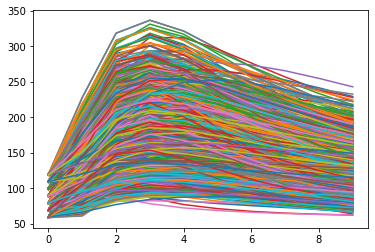

In [ ]:
for i in range(0, len(y_train)):
  plt.plot(x_train[i,:])
plt.show()

In [ ]:
#a = a.reshape(a.shape[0], 10, 1)
l=labels.to_numpy()
#l = l.reshape(a.shape[0], 3, 1)
len(np.unique(l))

3

In [ ]:
x

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [ ]:

a.shape

(1974, 10)

#Normalize

In [ ]:
from tensorflow import keras

a = a.astype('float32')
#x_test = x_test.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
a /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y_train.shape, 'l')

x_train shape: (1381, 10)
1381 train samples
593 test samples
(1381, 1) l


#RESNET

In [ ]:
# One hot encoding

train_series = x_train
test_series = x_test
train_series_labels = y_train
test_series_labels = x_test


In [ ]:
y_test.shape


(593, 1)

In [ ]:
print(train_series[:20])
print('-----------------')
print(train_series.shape)

[[ 70.0134   132.38647  191.76561  202.32079  190.72882  173.98427
  157.51317  142.82002  130.09349  119.31563 ]
 [ 99.326904 129.51721  181.99883  201.7759   197.77774  185.43687
  171.73457  158.98767  147.82812  138.25752 ]
 [ 69.569336  92.1271   116.01486  123.05091  120.85184  115.61738
  109.760765 104.122826  98.96046   94.35916 ]
 [100.001976 117.52131  152.96204  175.87845  183.27417  180.6161
  172.83044  163.04706  152.98657  143.57541 ]
 [ 88.90497  117.87369  160.67975  187.81172  197.38663  195.62965
  187.90884  177.60191  166.48975  155.53386 ]
 [ 70.00622  109.21156  155.48544  173.21524  167.28052  146.52997
  125.219086 108.212204  95.720795  87.05311 ]
 [ 99.19018  128.16779  160.30367  167.45198  160.13667  147.78728
  136.47449  127.04846  119.53378  113.68218 ]
 [ 60.007328 106.411354 160.65573  172.2776   160.73473  143.17863
  126.34722  112.04992  100.42959   91.05226 ]
 [ 60.00524  105.382324 182.92229  219.32336  218.1061   199.64793
  176.41911  153.79187

In [ ]:
print(test_series[:20])
print('-----------------')
print(test_series.shape)

[[119.26748  138.32623  157.82811  167.19913  168.74016  166.152
  161.82034  156.93996  152.06346  147.45067 ]
 [ 99.9829   116.07832  135.64705  141.13774  137.99553  131.53537
  125.20488  119.73716  115.244286 111.65499 ]
 [ 79.99244   95.75329  126.02946  143.05759  145.92822  141.32849
  133.93158  126.034706 118.61333  112.052864]
 [120.01008  155.3531   201.84409  232.2537   247.65575  252.53508
  250.66649  244.72978  236.53156  227.25452 ]
 [ 70.00874  101.80347  129.60136  136.83795  134.17844  128.3779
  121.95176  115.76     110.06453  104.95374 ]
 [110.00613  150.63419  198.5876   210.59131  200.88255  183.76216
  167.80429  154.43994  143.81999  135.58795 ]
 [120.06633  183.80838  234.23218  250.77873  248.30338  237.27554
  223.3502   209.25397  196.17719  184.54994 ]
 [ 90.016426 181.05002  274.14633  292.07962  277.56662  255.30635
  232.73741  211.75114  192.97072  176.54694 ]
 [ 69.19018   98.13827  129.73604  135.84102  127.35365  114.61491
  103.16884   93.81297  

# RESNET clasification


<hr>

<hr>

In [ ]:
 def build_model(self, input_shape, nb_classes):
        n_feature_maps = 64
        print(input_shape)
        input_layer = keras.layers.Input(input_shape)

        # BLOCK 1

        conv_x = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=8, padding='same')(input_layer)
        conv_x = keras.layers.BatchNormalization()(conv_x)
        conv_x = keras.layers.Activation('relu')(conv_x)

        conv_y = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=5, padding='same')(conv_x)
        conv_y = keras.layers.BatchNormalization()(conv_y)
        conv_y = keras.layers.Activation('relu')(conv_y)

        conv_z = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=3, padding='same')(conv_y)
        conv_z = keras.layers.BatchNormalization()(conv_z)

        # expand channels for the sum
        shortcut_y = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=1, padding='same')(input_layer)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)

        output_block_1 = keras.layers.add([shortcut_y, conv_z])
        output_block_1 = keras.layers.Activation('relu')(output_block_1)

        # BLOCK 2

        conv_x = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_1)
        conv_x = keras.layers.BatchNormalization()(conv_x)
        conv_x = keras.layers.Activation('relu')(conv_x)

        conv_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = keras.layers.BatchNormalization()(conv_y)
        conv_y = keras.layers.Activation('relu')(conv_y)

        conv_z = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = keras.layers.BatchNormalization()(conv_z)

        # expand channels for the sum
        shortcut_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=1, padding='same')(output_block_1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)

        output_block_2 = keras.layers.add([shortcut_y, conv_z])
        output_block_2 = keras.layers.Activation('relu')(output_block_2)

        # BLOCK 3

        conv_x = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_2)
        conv_x = keras.layers.BatchNormalization()(conv_x)
        conv_x = keras.layers.Activation('relu')(conv_x)

        conv_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = keras.layers.BatchNormalization()(conv_y)
        conv_y = keras.layers.Activation('relu')(conv_y)

        conv_z = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = keras.layers.BatchNormalization()(conv_z)

        # no need to expand channels because they are equal
        shortcut_y = keras.layers.BatchNormalization()(output_block_2)

        output_block_3 = keras.layers.add([shortcut_y, conv_z])
        output_block_3 = keras.layers.Activation('relu')(output_block_3)

        # FINAL

        gap_layer = keras.layers.GlobalAveragePooling1D()(output_block_3)

        output_layer = keras.layers.Dense(nb_classes, activation='softmax')(gap_layer)

        model = keras.models.Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])

        reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)

        file_path = self.output_directory + 'best_model.hdf5'

        model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='loss',
                                                           save_best_only=True)

        self.callbacks = [reduce_lr, model_checkpoint]

        return model

In [ ]:


from tensorflow import keras
import numpy as np
import pandas as pd

np.random.seed(813306)
 
def build_resnet(input_shape, n_feature_maps, nb_classes):
    print ('build conv_x')
    x = keras.layers.Input(shape=(input_shape))
    conv_x = keras.layers.BatchNormalization()(x)
    conv_x = keras.layers.Conv2D(n_feature_maps, 8, 1, padding='same')(conv_x)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps, 1, 1,padding='same')(x)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    print ('build conv_x')
    x1 = y
    conv_x = keras.layers.Conv2D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    print ('build conv_x')
    x1 = y
    conv_x = keras.layers.Conv2D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)

    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    full = keras.layers.GlobalAveragePooling2D()(y)
    out = keras.layers.Dense(nb_classes, activation='softmax')(full)
    print ('        -- model was built.')
    return x, out

In [ ]:
       
def readucr(filename):
    data = np.loadtxt(filename, delimiter = ',')
    Y = data[:,0]
    X = data[:,1:]
    return X, Y

In [ ]:

nb_epochs = 40
batch_size = 256

In [ ]:



fname = 'Adiac'

#x_train, y_train = readucr(fname+'_TRAIN')
#x_test, y_test = readucr(fname+'_TEST')
#x_train, y_train = a,l;
#x_test, y_test = a,l
#s = l.shape

nb_classes = len(np.unique(y_test))
batch_size = min(x_train.shape[0]/10, 16)


In [ ]:
nb_classes

3

In [ ]:
print(x_train, y_train)
print(x_train.shape, y_train.shape)

[[ 70.0134   132.38647  191.76561  ... 142.82002  130.09349  119.31563 ]
 [ 99.326904 129.51721  181.99883  ... 158.98767  147.82812  138.25752 ]
 [ 69.569336  92.1271   116.01486  ... 104.122826  98.96046   94.35916 ]
 ...
 [119.22768  151.63086  197.21277  ... 177.00812  168.4328   160.7481  ]
 [ 79.991684  95.894005 108.47005  ...  94.93788   91.56511   88.854996]
 [109.65223  120.572754 133.15067  ... 121.30473  118.19965  115.68287 ]] [[1]
 [2]
 [0]
 ...
 [2]
 [0]
 [1]]
(1381, 10) (1381, 1)


In [ ]:
y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)

In [ ]:
print(x_train, y_train)
print(x_train.shape, y_train.shape)

[[ 70.0134   132.38647  191.76561  ... 142.82002  130.09349  119.31563 ]
 [ 99.326904 129.51721  181.99883  ... 158.98767  147.82812  138.25752 ]
 [ 69.569336  92.1271   116.01486  ... 104.122826  98.96046   94.35916 ]
 ...
 [119.22768  151.63086  197.21277  ... 177.00812  168.4328   160.7481  ]
 [ 79.991684  95.894005 108.47005  ...  94.93788   91.56511   88.854996]
 [109.65223  120.572754 133.15067  ... 121.30473  118.19965  115.68287 ]] [[1.]
 [2.]
 [0.]
 ...
 [2.]
 [0.]
 [1.]]
(1381, 10) (1381, 1)


In [ ]:
Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)

In [ ]:
print(y_test.shape, y_train.shape)

(593, 1) (1381, 1)


In [ ]:
print(x_train, y_train)
print(x_train.shape, y_train.shape)

[[ 70.0134   132.38647  191.76561  ... 142.82002  130.09349  119.31563 ]
 [ 99.326904 129.51721  181.99883  ... 158.98767  147.82812  138.25752 ]
 [ 69.569336  92.1271   116.01486  ... 104.122826  98.96046   94.35916 ]
 ...
 [119.22768  151.63086  197.21277  ... 177.00812  168.4328   160.7481  ]
 [ 79.991684  95.894005 108.47005  ...  94.93788   91.56511   88.854996]
 [109.65223  120.572754 133.15067  ... 121.30473  118.19965  115.68287 ]] [[1.]
 [2.]
 [0.]
 ...
 [2.]
 [0.]
 [1.]]
(1381, 10) (1381, 1)


In [ ]:
x_train_mean = x_train.mean()
x_train_std = x_train.std()
x_train = (x_train - x_train_mean)/(x_train_std)

In [ ]:
x_test = (x_test - x_train_mean)/(x_train_std)
x_train = x_train.reshape(x_train.shape + (1,1,))
x_test = x_test.reshape(x_test.shape + (1,1,))

In [ ]:
print(x_train.shape, y_train.shape)

(1381, 10, 1, 1) (1381, 1)


In [ ]:
x_train.shape[1:]

(10, 1, 1)

In [ ]:
x , y = build_resnet(x_train.shape[1:], 64, nb_classes)
model = keras.models.Model(inputs=x, outputs=y)
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
  


build conv_x
build conv_y
build conv_z
Merging skip connection
build conv_x
build conv_y
build conv_z
Merging skip connection
build conv_x
build conv_y
build conv_z
Merging skip connection
        -- model was built.


In [ ]:
nb_epochs = 150
batch_size = 256

In [ ]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5,
                  patience=50, min_lr=0.0001) 
hist = model.fit(x_train, Y_train,epochs=nb_epochs, batch_size=batch_size)
log = pd.DataFrame(hist.history)
#print(log.loc[log['loss'].idxmin]['loss'], log.loc[log['loss'].idxmin]['val_acc'])

Epoch 1/150
6/6 [==============================] - 17s 2s/step - loss: 0.4983 - accuracy: 0.7610
Epoch 2/150
6/6 [==============================] - 12s 2s/step - loss: 0.1702 - accuracy: 0.9341
Epoch 3/150
6/6 [==============================] - 12s 2s/step - loss: 0.2144 - accuracy: 0.9117
Epoch 4/150
6/6 [==============================] - 11s 2s/step - loss: 0.1575 - accuracy: 0.9327
Epoch 5/150
6/6 [==============================] - 10s 2s/step - loss: 0.1631 - accuracy: 0.9312
Epoch 6/150
6/6 [==============================] - 11s 2s/step - loss: 0.1968 - accuracy: 0.9131
Epoch 7/150
6/6 [==============================] - 11s 2s/step - loss: 0.1655 - accuracy: 0.9232
Epoch 8/150
6/6 [==============================] - 11s 2s/step - loss: 0.1412 - accuracy: 0.9471
Epoch 9/150
6/6 [==============================] - 11s 2s/step - loss: 0.1437 - accuracy: 0.9348
Epoch 10/150
6/6 [==============================] - 11s 2s/step - loss: 0.2219 - accuracy: 0.9015
Epoch 11/150
6/6 [===========

In [ ]:

log = pd.DataFrame(hist.history)
log.head
log['loss'].idxmin

<bound method Series.idxmin of 0      0.498252
1      0.170200
2      0.214414
3      0.157528
4      0.163115
         ...   
145    0.068129
146    0.087339
147    0.091558
148    0.093431
149    0.060054
Name: loss, Length: 150, dtype: float64>

In [ ]:
predict = model.predict(x_test)

19/19 [==============================] - 2s 71ms/step


In [ ]:
test_preds = [np.argmax(i) for i in model.predict(x_test)]
y_test_res = [np.argmax(i) for i in  Y_test]
test_accuracy = 100*np.sum(np.array(test_preds)==y_test_res)/len(test_preds)
print('Accuracy of the model on test set:', test_accuracy)

19/19 [==============================] - 1s 41ms/step
Accuracy of the model on test set: 82.96795952782462


In [ ]:
 test = np.array(test_preds)
 print(np.array(test[20:40]),y_test_res[20:40])

[1 0 2 1 0 0 1 2 2 2 0 0 2 1 2 2 1 2 2 1] [1, 0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1]


#Evaluación

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#y_pred = np.argmax(p, axis=-1)
#y_true=np.argmax(y_test, axis=-1)

In [ ]:
y_pred = test
y_true = np.array(y_test_res)


In [ ]:
#aqui
y_pred1 = keras.utils.to_categorical(y_pred, 5)
y_true1 = keras.utils.to_categorical(y_true, 5)

In [ ]:
print(y_pred1[:,1],y_true1[:,1])

[1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
# Compute ROC curve and ROC area for each class
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_pred1[:, i], y_true1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_pred1.ravel(), y_true1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

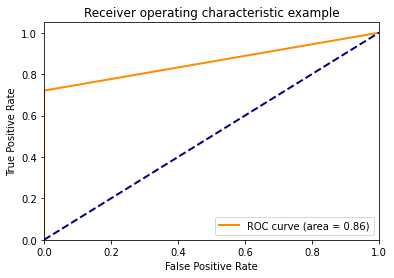

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

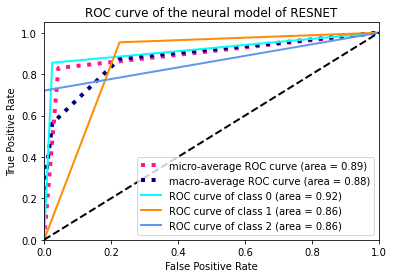

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of the neural model of RESNET")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#y_pred = np.argmax(p, axis=-1)
#y_true=np.argmax(y_test, axis=-1)



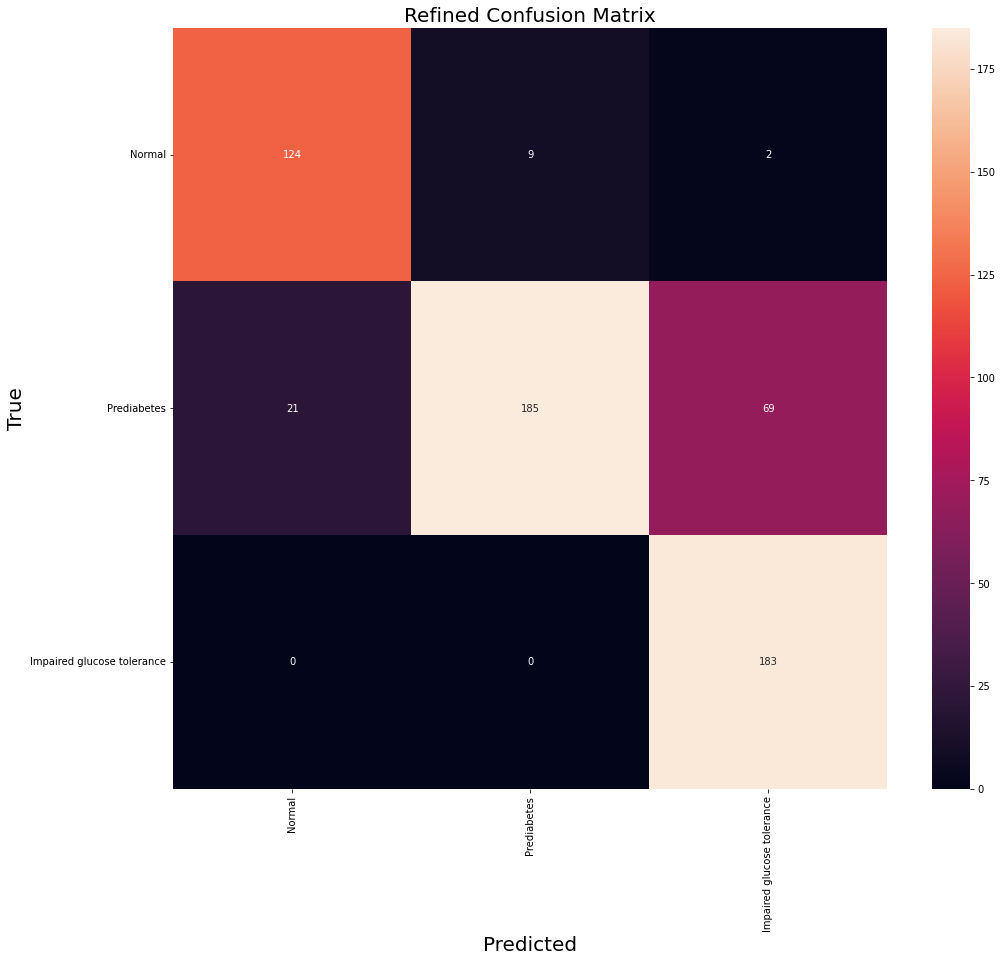

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
#labels = le.classes_
class_names = ['Normal','Prediabetes','Impaired glucose tolerance','Diabetes']

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
cm

array([[124,   9,   2],
       [ 21, 185,  69],
       [  0,   0, 183]])

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_true, y_pred )
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average=None)

In [ ]:
# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(y_true, y_pred, average=None)

In [ ]:
print(ac,recall,precision,f1)

0.8296795952782462 [0.91851852 0.67272727 1.        ] [0.85517241 0.95360825 0.72047244] [0.88571429 0.78891258 0.8375286 ]


#Test with real data

##healthy 0, glucose intolerance = 1, diabetes = 2

In [ ]:
import numpy as np
patient_test = np.array(([ 82., 155.,  141. , 103. ,  96. ,  89. ,  89. , 89. ,  89., 89. ],
                         [ 82.,   118.,  140. , 148., 147.,  146.,  146.,  146.,  146., 146. ],
                         [ 92. , 133.,  72. , 87., 92.,  92. , 92., 92., 92., 92.],
                         [ 157. , 185.,  232. , 216., 197.,  192. , 192., 192., 192., 192.],
                         [ 70, 70, 148, 148, 116, 97, 97, 97, 97, 97 ] ,
                         [ 79, 79, 157, 157, 116, 84, 84, 84, 84, 84 ],
                         [ 82, 82, 94, 94, 102, 102, 102, 102, 102, 102 ] ,
                         [ 95, 95, 180, 180, 155, 155, 140, 140, 140, 140 ],
                         [ 84, 84, 84, 84, 164, 164, 164, 164, 164, 164 ],
                         [ 73, 73, 99, 99, 82, 82, 82, 82, 82, 82 ] , 
                         [ 61, 61, 94, 94, 90, 90, 90, 90, 90, 90 ],
                         [ 100, 100, 100, 100, 149, 149, 149, 149, 149, 149 ],
                         [ 63, 63, 63, 63, 87, 87, 87, 87, 87, 87 ] ,
                         [ 75, 75, 75, 75, 91, 91, 91, 91, 91, 91 ], 
                         [ 117, 117, 145, 145, 98, 98, 98, 98, 98, 98 ],
                         [ 120, 120, 120, 120, 136, 136, 136,136, 136, 136 ]
                         ))
patient_test.shape

(16, 10)

In [ ]:
patient_test = (patient_test - x_train_mean)/(x_train_std)
patient_test = patient_test.reshape(patient_test.shape + (1,1,))

In [ ]:
predict = model.predict(patient_test)
print (predict)

1/1 [==============================] - 0s 59ms/step
[[9.9997503e-01 2.3768753e-05 1.1642124e-06]
 [3.3779371e-01 6.6207725e-01 1.2898323e-04]
 [9.9981594e-01 1.7892721e-04 5.0699982e-06]
 [8.2605402e-06 2.1724172e-06 9.9998945e-01]
 [9.3096095e-01 1.9832563e-02 4.9206447e-02]
 [5.8202761e-01 3.9394206e-01 2.4030309e-02]
 [9.9999279e-01 6.7176261e-06 5.0962427e-07]
 [1.0487413e-04 9.6681321e-01 3.3081912e-02]
 [2.8110870e-07 5.3976923e-12 9.9999970e-01]
 [9.9999541e-01 3.7686627e-06 7.6844390e-07]
 [9.9999136e-01 1.6012689e-06 7.0214828e-06]
 [8.7745109e-04 9.9879432e-01 3.2824493e-04]
 [9.9930692e-01 2.4750578e-05 6.6825759e-04]
 [9.9998742e-01 1.1593304e-05 1.0052050e-06]
 [1.6122520e-02 9.8340416e-01 4.7325320e-04]
 [6.7487149e-06 9.9995321e-01 3.9969276e-05]]


In [ ]:
y_pred = np.argmax(predict, axis=-1)
y_pred 

array([0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1])

# sano 0, intolerante 1, prediabetico 2, diabetico 3

In [ ]:
label = [0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]


In [ ]:

# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(label, y_pred, average=None)

In [ ]:
print(ac,recall,precision,f1)

0.8296795952782462 [0.91851852 0.67272727 1.        ] [0.85517241 0.95360825 0.72047244] [1.         0.90909091 0.66666667]
